# Import Libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [2]:
from base.preprocess_clustering import Preprocess_Clustering
from base.plot import Plots
from base.AnomalyDetection import AnomalyDetection
from base.RootCause import RootCause

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\P

In [3]:
preprocess_clustering = Preprocess_Clustering()
plots = Plots()
anomalyDetection = AnomalyDetection()
RootCause = RootCause()

object created
plotting ...


# 1. Load and Preprocess Data

In [4]:
data = preprocess_clustering.load_data(path="Data/events_NormalDuplicateSensors.log")
data

,time,Command_v1,id,Source,Destination,Command_v2,Time_integer
1,0.238,brightnessLevel_2:40,LightSensor2,13,Controller,brightnessLevel_2,0
2,0.244,brightnessLevel_1:40,LightSensor1,12,Controller,brightnessLevel_1,0
3,0.244,lightOn,Controller,1,Lights,lightOn,0
4,0.253,ElectricityLevelofLights1:10,ElectricityLevel4Lights1,3,Controller,ElectricityLevelofLights1,0
5,0.253,ElectricityLevelofLights2:10,ElectricityLevel4Lights2,4,Controller,ElectricityLevelofLights2,0
...,...,...,...,...,...,...,...
214258,23521.009,brightnessLevel_1:118,LightSensor1,12,Controller,brightnessLevel_1,23521
214259,23521.009,temperature_2:47.63620394473484,Thermostat2,11,Controller,temperature_2,23521
214260,23521.009,temperature_1:47.63620394473484,Thermostat_1,10,Controller,temperature_1,23521
214261,23521.108,ElectricityLevelOfHeater1:0,5,ElectricityLevel4Heater1,Controller,ElectricityLevelOfHeater1,23521


In [5]:
df = preprocess_clustering.prepration_data(data, 23521, 1)
df

,index,Command_v2,tokenized_sents
0,0,brightnessLevel_2 brightnessLevel_1 lightOn El...,"[brightnesslevel_2, brightnesslevel_1, lighton..."
1,1,brightnessLevel_1 ElectricityLevelofLights1 El...,"[brightnesslevel_1, electricityleveloflights1,..."
2,2,brightnessLevel_2 ElectricityLevelofLights2 El...,"[brightnesslevel_2, electricityleveloflights2,..."
3,3,brightnessLevel_2 brightnessLevel_1 Electricit...,"[brightnesslevel_2, brightnesslevel_1, electri..."
4,4,brightnessLevel_1 brightnessLevel_2 Electricit...,"[brightnesslevel_1, brightnesslevel_2, electri..."
...,...,...,...
23444,23444,ElectricityLevelofLights2 ElectricityLevelofLi...,"[electricityleveloflights2, electricitylevelof..."
23445,23445,brightnessLevel_2 brightnessLevel_1 Electricit...,"[brightnesslevel_2, brightnesslevel_1, electri..."
23446,23446,ElectricityLevelofLights1 ElectricityLevelofLi...,"[electricityleveloflights1, electricitylevelof..."
23447,23447,ElectricityLevelofLights1 brightnessLevel_2 El...,"[electricityleveloflights1, brightnesslevel_2,..."


In [6]:
command = list(df.tokenized_sents.values)

# 2. Word Embedding

### 2.1 Word2Vec

In [8]:
X_w2v, vocab_w2v, model_w2v = preprocess_clustering.word2vec(command, vector_size=256, window=5, epochs=10, workers=4)

In [9]:
pca_result_w2v, pca_result_w2v_normalized = preprocess_clustering.PCA(n_components=8, alg_output=X_w2v)
pca_df_w2v = preprocess_clustering.DReduction_to_DataFrame(pca_result_w2v, vocab_w2v, 8, label=None)
pca_df_w2v_normalized = preprocess_clustering.DReduction_to_DataFrame(pca_result_w2v_normalized, vocab_w2v, 8, label=None)
plots.dimension_reduction_plot(df = pca_df_w2v,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_w2v_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [10]:
umap_result_w2v, umap_result_w2v_normalized = preprocess_clustering.UMAP(n_components=8, alg_output=X_w2v)
umap_df_w2v = preprocess_clustering.DReduction_to_DataFrame(umap_result_w2v, vocab, 8, label=None)
umap_df_w2v_normalized = preprocess_clustering.DReduction_to_DataFrame(umap_result_w2v_normalized, vocab, 8, label=None)
plots.dimension_reduction_plot(df = umap_df_w2v,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_w2v_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



### 2.2 FastText

In [14]:
X_ft, vocab_ft, model_ft = preprocess_clustering.fastText(command, vector_size=256, window=5, sg= 1, epochs=20, workers = 4, seed=42)

In [15]:
pca_result_ft, pca_result_normalized_ft = preprocess_clustering.PCA(n_components=5, alg_output=X_ft)
pca_df_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_ft, vocab_ft, 5, label=None)
pca_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = pca_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_normalized_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [16]:
umap_result_ft, umap_result_normalized_ft = preprocess_clustering.UMAP(n_components=5, alg_output=X_ft)
umap_df_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_ft, vocab_ft, 5, label=None)
umap_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = umap_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_normalized_ft,  wordEmbedding_alg = 'Fasttext',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



# 3. Clustering

### Word2vec output

In [17]:
pca_df_w2v['label_Kmeans'] = preprocess_clustering.kmeans(pca_result_w2v, 2)
pca_df_w2v['label_Kmeans'] = pca_df_w2v['label_Kmeans'].astype('str')
plots.clustering_plot(pca_df_w2v , pca_df_w2v['label_Kmeans'], 'Kmenas')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [18]:
pca_df_w2v['label_Spectral'] = preprocess_clustering.SpectralClustering(pca_result_w2v, 2)
pca_df_w2v['label_Spectral'] = pca_df_w2v['label_Spectral'].astype('str')
plots.clustering_plot(pca_df_w2v, pca_df_w2v['label_Spectral'], 'Spectral')

In [19]:
pca_df_w2v['label_DBSCAN'] =  preprocess_clustering.DBSACN(pca_result_w2v, 0.9, 2)
pca_df_w2v['label_DBSCAN'] = pca_df_w2v['label_DBSCAN'].astype('str')
plots.clustering_plot(pca_df_w2v, pca_df_w2v['label_DBSCAN'], 'DBSCAN')

In [25]:
pca_df_w2v.to_csv('Duplicate_labels_sensor_actuator.csv')

In [20]:
pca_df_w2v['label_Agglomerative']  = preprocess_clustering.AgglomerativeClustering(pca_result_w2v, 2)
pca_df_w2v['label_Agglomerative'] = pca_df_w2v['label_Agglomerative'].astype('str')
plots.clustering_plot(pca_df_w2v, pca_df_w2v['label_Agglomerative'], 'Agglomerative')

### fastText Output

In [21]:
pca_df_ft['label_Kmeans'] = preprocess_clustering.kmeans(pca_result_ft, 2)
pca_df_ft['label_Kmeans'] = pca_df_ft['label_Kmeans'].astype('str')
plots.clustering_plot(pca_df_ft , pca_df_ft['label_Kmeans'], 'Kmenas')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [22]:
pca_df_ft['label_Spectral'] = preprocess_clustering.SpectralClustering(pca_result_ft, 2)
pca_df_ft['label_Spectral'] = pca_df_ft['label_Spectral'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_Spectral'], 'Spectral')

In [23]:
pca_df_ft['label_DBSCAN'] =  preprocess_clustering.DBSACN(pca_result_ft, 0.9, 2)
pca_df_ft['label_DBSCAN'] = pca_df_ft['label_DBSCAN'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_DBSCAN'], 'DBSCAN')

In [24]:
pca_df_ft['label_Agglomerative']  = preprocess_clustering.AgglomerativeClustering(pca_result_ft, 2)
pca_df_ft['label_Agglomerative'] = pca_df_ft['label_Agglomerative'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_Agglomerative'], 'Agglomerative')

### Assign Labels

In [5]:
pca_df_w2v = pd.read_csv('Duplicate_labels_sensor_actuator.csv')

In [6]:
Labels = []
for i in data.Command_v2:
    for j,k in zip(pca_df_w2v.Words, pca_df_w2v['label_DBSCAN']):
        if i.lower() == j.lower():
            Labels.append(k)


data["Labels"] = Labels
data.Labels = data.Labels.astype('str')
data[['Command', 'Value']] = data.Command_v1.str.split(':', expand=True)
data.drop('Command', axis=1, inplace=True)
data.Value = data.Value.astype('float')
data

,time,Command_v1,id,Source,Destination,Command_v2,Time_integer,Labels,Value
1,0.238,brightnessLevel_2:40,LightSensor2,13,Controller,brightnessLevel_2,0,-1,40.000000
2,0.244,brightnessLevel_1:40,LightSensor1,12,Controller,brightnessLevel_1,0,-1,40.000000
3,0.244,lightOn,Controller,1,Lights,lightOn,0,0,NaN
4,0.253,ElectricityLevelofLights1:10,ElectricityLevel4Lights1,3,Controller,ElectricityLevelofLights1,0,-1,10.000000
5,0.253,ElectricityLevelofLights2:10,ElectricityLevel4Lights2,4,Controller,ElectricityLevelofLights2,0,-1,10.000000
...,...,...,...,...,...,...,...,...,...
214258,23521.009,brightnessLevel_1:118,LightSensor1,12,Controller,brightnessLevel_1,23521,-1,118.000000
214259,23521.009,temperature_2:47.63620394473484,Thermostat2,11,Controller,temperature_2,23521,-1,47.636204
214260,23521.009,temperature_1:47.63620394473484,Thermostat_1,10,Controller,temperature_1,23521,-1,47.636204
214261,23521.108,ElectricityLevelOfHeater1:0,5,ElectricityLevel4Heater1,Controller,ElectricityLevelOfHeater1,23521,-1,0.000000


### Find Actuators and Sensors

In [31]:
df_sensors = data.loc[data.Labels == '-1', :]
df_actuators = data.loc[data.Labels == '0', :]

C:\Users\Olympic\AppData\Local\Temp\ipykernel_16032\1406164037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actuators.fillna(0, inplace=True)
c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

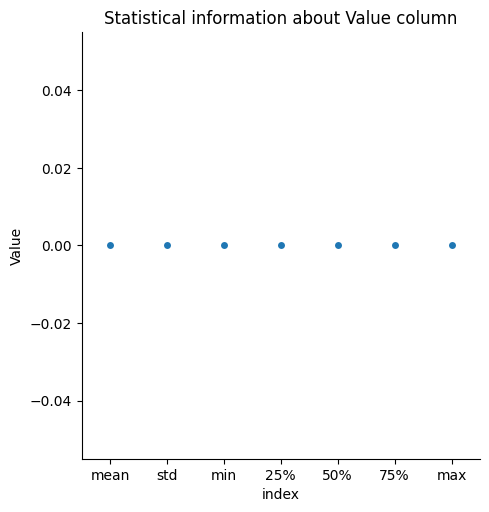

In [8]:
df_actuators.fillna(0, inplace=True)
num_col_df_actuators = df_actuators._get_numeric_data().columns
plots.plot_describe(df_actuators)

C:\Users\Olympic\AppData\Local\Temp\ipykernel_16032\2341463761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensors.fillna(0, inplace=True)
c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

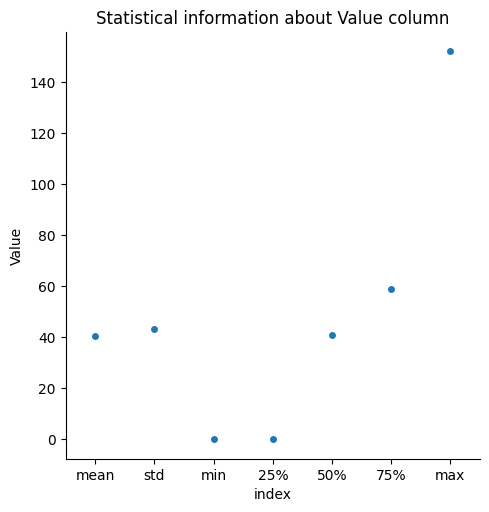

In [10]:
df_sensors.fillna(0, inplace=True)
num_col_df_sensors = df_sensors._get_numeric_data().columns
plots.plot_describe(df_sensors)

In [11]:
df_sensors  = preprocess_clustering.prepration_data(df_sensors , 23521, 1)
df_sensors

,index,Command_v2,tokenized_sents
0,0,brightnessLevel_2 brightnessLevel_1 Electricit...,"[brightnesslevel_2, brightnesslevel_1, electri..."
1,1,brightnessLevel_1 ElectricityLevelofLights1 El...,"[brightnesslevel_1, electricityleveloflights1,..."
2,2,brightnessLevel_2 ElectricityLevelofLights2 El...,"[brightnesslevel_2, electricityleveloflights2,..."
3,3,brightnessLevel_2 brightnessLevel_1 Electricit...,"[brightnesslevel_2, brightnesslevel_1, electri..."
4,4,brightnessLevel_1 brightnessLevel_2 Electricit...,"[brightnesslevel_1, brightnesslevel_2, electri..."
...,...,...,...
23444,23444,ElectricityLevelofLights2 ElectricityLevelofLi...,"[electricityleveloflights2, electricitylevelof..."
23445,23445,brightnessLevel_2 brightnessLevel_1 Electricit...,"[brightnesslevel_2, brightnesslevel_1, electri..."
23446,23446,ElectricityLevelofLights1 ElectricityLevelofLi...,"[electricityleveloflights1, electricitylevelof..."
23447,23447,ElectricityLevelofLights1 brightnessLevel_2 El...,"[electricityleveloflights1, brightnesslevel_2,..."


In [12]:
command_sensors = list(df_sensors.tokenized_sents.values)

### Separate Sensors

In [17]:
X_w2v, vocab, model = preprocess_clustering.word2vec(command_sensors, vector_size=256, window=4, epochs=20, workers=4)

In [19]:
pca_result, pca_result_normalized = preprocess_clustering.PCA(n_components=5, alg_output=X_w2v)
pca_df = preprocess_clustering.DReduction_to_DataFrame(pca_result, vocab, 5, label=None)
pca_df_normalized = preprocess_clustering.DReduction_to_DataFrame(pca_result_normalized, vocab, 5, label=None)
plots.dimension_reduction_plot(df = pca_df,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [20]:
umap_result, umap_result_normalized = preprocess_clustering.UMAP(n_components=8, alg_output=X_w2v)
umap_df = preprocess_clustering.DReduction_to_DataFrame(umap_result, vocab, 8, label=None)
umap_df_normalized = preprocess_clustering.DReduction_to_DataFrame(umap_result_normalized, vocab, 8, label=None)
plots.dimension_reduction_plot(df = umap_df,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [21]:
X_ft, vocab_ft, model_ft = preprocess_clustering.fastText(command_sensors, vector_size=256, window=2, sg= 1, epochs=20, workers = 4, seed=42)

In [22]:
pca_result_ft, pca_result_normalized_ft = preprocess_clustering.PCA(n_components=5, alg_output=X_ft)
pca_df_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_ft, vocab_ft, 5, label=None)
pca_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = pca_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_normalized_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [23]:
umap_result_ft, umap_result_normalized_ft = preprocess_clustering.UMAP(n_components=5, alg_output=X_ft)
umap_df_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_ft, vocab_ft, 5, label=None)
umap_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = umap_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_normalized_ft,  wordEmbedding_alg = 'Fasttext',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [24]:
pca_df_ft['label_Kmeans'] = preprocess_clustering.kmeans(pca_result_ft, 4)
pca_df_ft['label_Kmeans'] = pca_df_ft['label_Kmeans'].astype('str')
plots.clustering_plot(pca_df_ft , pca_df_ft['label_Kmeans'], 'Kmenas')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
pca_df_ft['label_Spectral'] = preprocess_clustering.SpectralClustering(pca_result_ft, 4)
pca_df_ft['label_Spectral'] = pca_df_ft['label_Spectral'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_Spectral'], 'Spectral')

In [29]:
pca_df_ft['label_DBSCAN'] =  preprocess_clustering.DBSACN(pca_result_ft, 0.3, 2)
pca_df_ft['label_DBSCAN'] = pca_df_ft['label_DBSCAN'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_DBSCAN'], 'DBSCAN')

In [30]:
pca_df_ft['label_Agglomerative']  = preprocess_clustering.AgglomerativeClustering(pca_result_ft, 4)
pca_df_ft['label_Agglomerative'] = pca_df_ft['label_Agglomerative'].astype('str')
plots.clustering_plot(pca_df_ft, pca_df_ft['label_Agglomerative'], 'Agglomerative')

In [34]:
Labels = []
for i in df_sensors.Command_v2:
    for j,k in zip(pca_df_ft.Words, pca_df_ft['label_Spectral']):
        if i.lower() == j.lower():
            Labels.append(k)


df_sensors["Labels"] = Labels
df_sensors.Labels = df_sensors.Labels.astype('str')
df_sensors

C:\Users\Olympic\AppData\Local\Temp\ipykernel_16032\932393538.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Olympic\AppData\Local\Temp\ipykernel_16032\932393538.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,Command_v1,id,Source,Destination,Command_v2,Time_integer,Labels,Value
1,0.238,brightnessLevel_2:40,LightSensor2,13,Controller,brightnessLevel_2,0,0,40.000000
2,0.244,brightnessLevel_1:40,LightSensor1,12,Controller,brightnessLevel_1,0,0,40.000000
4,0.253,ElectricityLevelofLights1:10,ElectricityLevel4Lights1,3,Controller,ElectricityLevelofLights1,0,1,10.000000
5,0.253,ElectricityLevelofLights2:10,ElectricityLevel4Lights2,4,Controller,ElectricityLevelofLights2,0,1,10.000000
6,0.390,temperature_1:11,Thermostat_1,10,Controller,temperature_1,0,2,11.000000
...,...,...,...,...,...,...,...,...,...
214258,23521.009,brightnessLevel_1:118,LightSensor1,12,Controller,brightnessLevel_1,23521,0,118.000000
214259,23521.009,temperature_2:47.63620394473484,Thermostat2,11,Controller,temperature_2,23521,2,47.636204
214260,23521.009,temperature_1:47.63620394473484,Thermostat_1,10,Controller,temperature_1,23521,2,47.636204
214261,23521.108,ElectricityLevelOfHeater1:0,5,ElectricityLevel4Heater1,Controller,ElectricityLevelOfHeater1,23521,3,0.000000


In [35]:
sensor_1 = df_sensors.loc[df_sensors.Labels == '0', :]
sensor_2 = df_sensors.loc[df_sensors.Labels == '1', :]
sensor_3 = df_sensors.loc[df_sensors.Labels == '2', :]
sensor_4 = df_sensors.loc[df_sensors.Labels == '3', :]

In [36]:
sensor_1

,time,Command_v1,id,Source,Destination,Command_v2,Time_integer,Labels,Value
1,0.238,brightnessLevel_2:40,LightSensor2,13,Controller,brightnessLevel_2,0,0,40.0
2,0.244,brightnessLevel_1:40,LightSensor1,12,Controller,brightnessLevel_1,0,0,40.0
13,1.029,brightnessLevel_1:130,LightSensor1,12,Controller,brightnessLevel_1,1,0,130.0
16,1.029,brightnessLevel_2:130,LightSensor2,13,Controller,brightnessLevel_2,1,0,130.0
22,2.036,brightnessLevel_2:152,LightSensor2,13,Controller,brightnessLevel_2,2,0,152.0
...,...,...,...,...,...,...,...,...,...
214239,23519.015,brightnessLevel_1:72,LightSensor1,12,Controller,brightnessLevel_1,23519,0,72.0
214247,23520.008,brightnessLevel_2:128,LightSensor2,13,Controller,brightnessLevel_2,23520,0,128.0
214249,23520.030,brightnessLevel_1:128,LightSensor1,12,Controller,brightnessLevel_1,23520,0,128.0
214255,23521.009,brightnessLevel_2:118,LightSensor2,13,Controller,brightnessLevel_2,23521,0,118.0


# 4. Anomaly Detection

In [100]:
def compare_sensors_value(data, id_1, id_2, column):
    value_1 = data.loc[data.Source == id_1, column].reset_index(drop=True)
    value_2 = data.loc[data.Source == id_2, column].reset_index(drop=True)
    data['comparison_result']  =   value_1 ==  value_2
    anomaly = data.loc[data['comparison_result'] == False, 'Time_integer']
    print("Anomaly Detected:", anomaly)
    return anomaly

In [91]:
new_rows = pd.DataFrame({'time': [23522.009, 23522.009], 'Command_v1': ['brightnessLevel_2:119', 'brightnessLevel_2:20'], 
                         'id': ['LightSensor2', 'LightSensor1'], 'Source': ['13', '12'], 
                         'Destination': ['Controller', 'Controller'], 
                         'Command_v2': ['brightnessLevel_2', 'brightnessLevel_1'], 
                         'Time_integer': [23522, 23522], 
                         'Labels': [0, 0], 'Value':[119, 20]})
sensor_1 = pd.concat([sensor_1, new_rows], ignore_index=True)

In [101]:
anomaly_sensor_1 = compare_sensors_value(sensor_1, np.unique(sensor_1.Source)[0], np.unique(sensor_1.Source)[1], 'Value')

Anomaly Detected: 23522    11761
Name: Time_integer, dtype: int64


### Learn Actuators Behavior

In [39]:
df_Heater = df_actuators.loc[df_actuators.Destination ==np.unique(df_actuators.Destination)[0], :]
df_lights = df_actuators.loc[df_actuators.Destination ==np.unique(df_actuators.Destination)[1], :]
df_lights_command = df_lights.Command_v1
df_Heater_command = df_Heater.Command_v1

In [73]:
def convert_to_oneHot(df):
    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer(binary=True)

    # Fit and transform your data
    one_hot_encoded = vectorizer.fit_transform(df)

    # Convert the sparse matrix to a dense numpy array
    one_hot_encoded_array = one_hot_encoded.toarray()
    one_hot_encoded_array = np.array(one_hot_encoded_array)
    
    return one_hot_encoded_array

def Learn_actuator_behavior(one_hot_encoded_array, sequence_length, optimizer, loss, epochs, batch_size):
    # Prepare sequences
    sequences = []
    for i in range(len(one_hot_encoded_array) - sequence_length + 1):
        sequences.append(one_hot_encoded_array[i:i+sequence_length])

    sequences = np.array(sequences)

    # Build LSTM autoencoder
    model = Sequential([
        LSTM(64, input_shape=(sequence_length, one_hot_encoded_array.shape[1]), return_sequences=True),
        Dense(one_hot_encoded_array.shape[1])
    ])

    model.compile(optimizer=optimizer, loss=loss)

    # Train the model
    history = model.fit(sequences, sequences, epochs=epochs, batch_size=batch_size)
    
    return sequences, model, history

def detect_anomaly(sequence, model, threshold):
    predicted_sequence =model.predict(np.array([sequence]))
    reconstruction_error = np.mean(np.square(predicted_sequence - sequence))
    
    if reconstruction_error > threshold:
        return True, reconstruction_error
    else:
        return False, reconstruction_error
    
def loss_plot(history):
    # Access training history
    loss = history.history['loss']
    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(loss, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.title('Mean Square Error in Train Data (Normal Data)')
    # plt.savefig('MSE_LSTM_Actuator_lights.eps', format='eps', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

### first Actuator

In [56]:
one_hot_encoded_light = convert_to_oneHot(df_lights_command)
sequences_light, model_light, history_light = Learn_actuator_behavior(one_hot_encoded_light, 10, 'adam', 'mse', 50, 32)

Epoch 1/50
15/15 [==============================] - 8s 11ms/step - loss: 0.4213
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2908
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.2515
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.2154
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1696
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1017
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0512
Epoch 8/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0370
Epoch 9/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0285
Epoch 10/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 11/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 12/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0152
Epoch 13/50
15/15 [==================

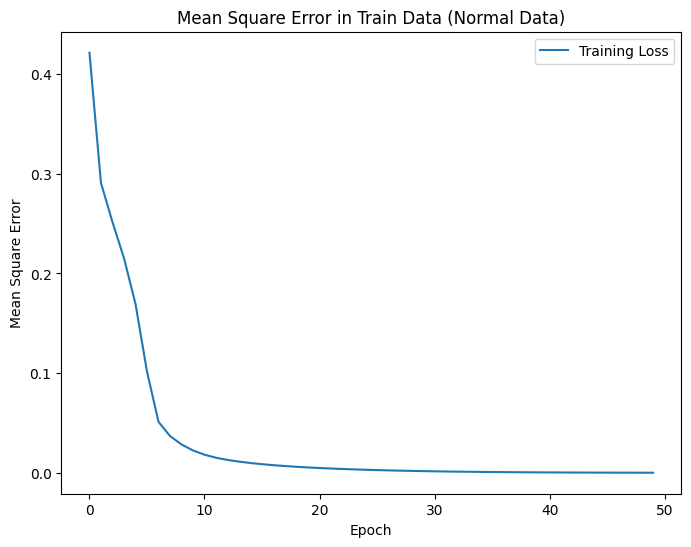

In [57]:
loss_plot(history_light)

In [70]:
predicted_sequence_light = model_light.predict(sequences_light)
reconstruction_error_light = np.mean(np.square(sequences_light - predicted_sequence_light))
reconstruction_error_light

15/15 [==============================] - 0s 4ms/step


0.00011152344194106175

In [77]:
# Predict using trained model
new_sequence = np.array([[[0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0]],
       [[1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],
       [[0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0]]])

# Set a threshold for anomaly detection
threshold = 0.0002
# Detect anomalies in the dataset
for i, seq in enumerate(new_sequence):
    is_anomaly, error = detect_anomaly(seq, model_light, threshold)
    
    if is_anomaly:
        print(f"Anomaly detected at index {i}, reconstruction error: {error:.4f}")

1/1 [==============================] - 0s 47ms/step
Anomaly detected at index 1, reconstruction error: 0.0008
1/1 [==============================] - 0s 41ms/step
Anomaly detected at index 2, reconstruction error: 0.0002


### Second Actuator

In [65]:
one_hot_encoded_Heater = convert_to_oneHot(df_Heater_command)
sequences_Heater, model_Heater, history_Heater = Learn_actuator_behavior(one_hot_encoded_Heater, 10, 'adam', 'mse', 50, 32)

Epoch 1/50
66/66 [==============================] - 8s 10ms/step - loss: 0.2583
Epoch 2/50
66/66 [==============================] - 1s 10ms/step - loss: 0.0520
Epoch 3/50
66/66 [==============================] - 1s 13ms/step - loss: 0.0136
Epoch 4/50
66/66 [==============================] - 1s 10ms/step - loss: 0.0070
Epoch 5/50
66/66 [==============================] - 1s 10ms/step - loss: 0.0041
Epoch 6/50
66/66 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 7/50
66/66 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 8/50
66/66 [==============================] - 1s 11ms/step - loss: 6.9177e-04
Epoch 9/50
66/66 [==============================] - 1s 12ms/step - loss: 3.3349e-04
Epoch 10/50
66/66 [==============================] - 1s 12ms/step - loss: 1.5017e-04
Epoch 11/50
66/66 [==============================] - 1s 12ms/step - loss: 6.6623e-05
Epoch 12/50
66/66 [==============================] - 1s 13ms/step - loss: 3.2095e-05
Epoch 13/50
66/66

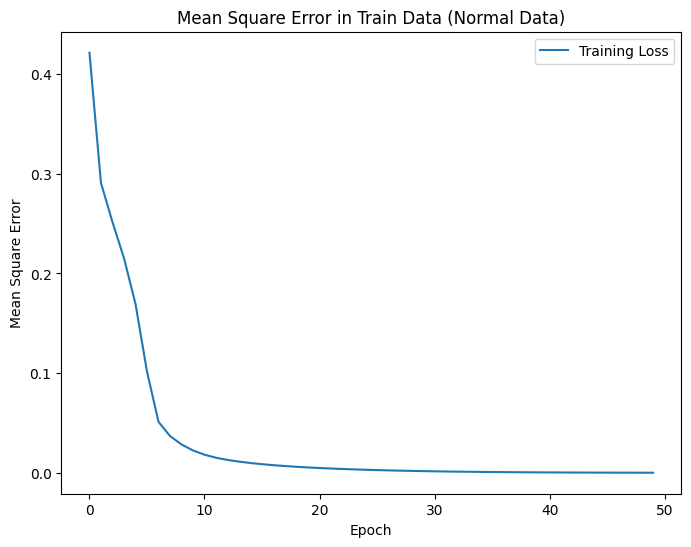

In [66]:
loss_plot(history_light)

In [69]:
predicted_sequence_Heater = model_Heater.predict(sequences_Heater)
reconstruction_error_Heater = np.mean(np.square(sequences_Heater - predicted_sequence_Heater))
reconstruction_error_Heater

66/66 [==============================] - 0s 4ms/step


9.289862832645235e-07